In [1]:
import numpy as np
import retworkx as rx
import pandas as pd
import os
import time
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pennylane as qml
from pennylane.templates import AngleEmbedding, StronglyEntanglingLayers
from pennylane.operation import Tensor
import matplotlib.pyplot as plt

# get the current directory
cur_dir = os.getcwd()

# Import the dataset
df = pd.read_csv(os.path.join(cur_dir, '../../Datasets/normalized_heart_slimmed.csv'), header=0)

# split into x, y
X, y = df.drop('output', axis=1), df['output']

# Need to scale the data to normal distribution for embeddings to work
scaler = StandardScaler().fit(X)
X_scaled = scaler.transform(X)
print("Mean: ", X_scaled.mean(), "Standard Deviation: ", X_scaled.std())
y_scaled = 2 * (y - 0.5)
print("Unique labels:", np.unique(y_scaled))

# Train/test split for model development
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled)

# Embed the data. First define the number of qubits
n_qubits = len(X_scaled[0])

# Set up the projector
dev_kernel = qml.device("default.qubit", wires=n_qubits)

projector = np.zeros((2**n_qubits, 2**n_qubits))
projector[0, 0] = 1

# Define the kernel
@qml.qnode(dev_kernel)
def kernel(x1, x2):
    """The quantum kernel."""
    AngleEmbedding(x1, wires=range(n_qubits))
    qml.adjoint(AngleEmbedding)(x2, wires=range(n_qubits))
    return qml.expval(qml.Hermitian(projector, wires=range(n_qubits)))

# Needed for SVC function
def kernel_matrix(A, B):
    return np.array([[kernel(a, b) for b in B] for a in A])

Mean:  -3.908375884268978e-17 Standard Deviation:  1.0
Unique labels: [-1.  1.]


(<Figure size 500x1000 with 1 Axes>, <Axes:>)


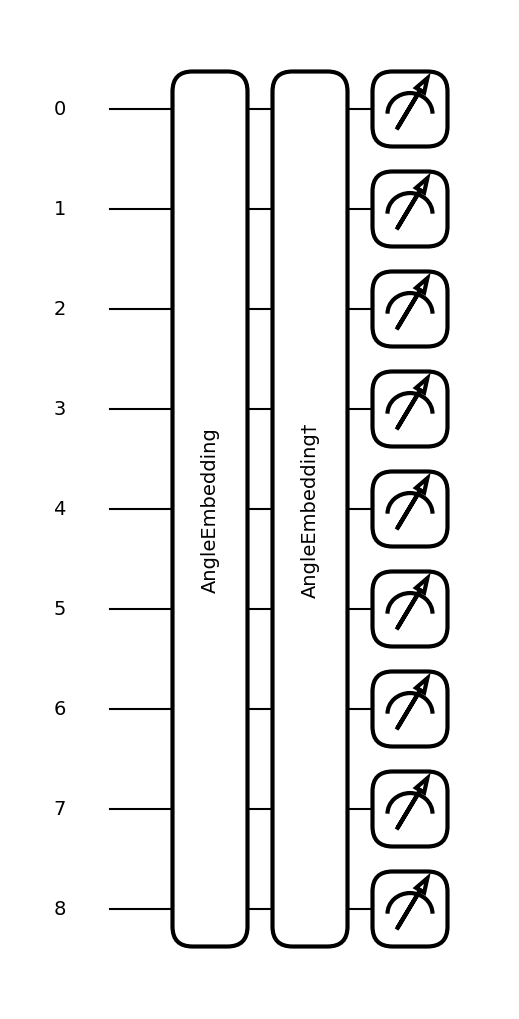

In [5]:
precompute = np.zeros((len(X_train), len(X_train)))
print(qml.draw_mpl(kernel)(X_train[0], X_train[1]))

In [5]:
print(X_train.shape)

(227, 9)
